[link text](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)

https://medium.com/mlearning-ai/customer-segmentation-using-k-means-clustering-ae73e3d82934

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Mall_Customers.csv')

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df_1 = df.drop(labels='CustomerID', axis=1)

In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


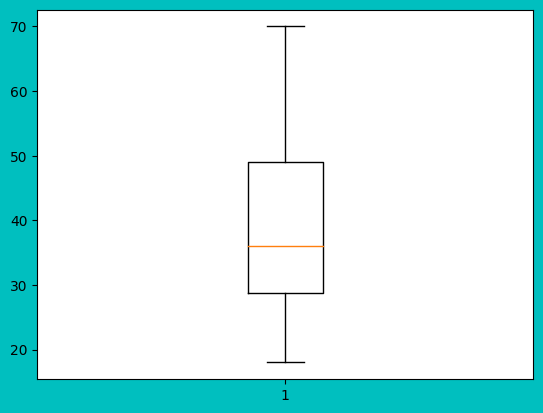

In [30]:
plt.figure(facecolor='c')
plt.boxplot(x=df_1['Age'])
plt.show()

In [31]:
df_1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [32]:
df_1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
df.duplicated().sum()

0

Data Preprocessing

In [34]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
ct = ColumnTransformer(transformers=[('scale', MinMaxScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
  ('oht', OneHotEncoder(), ['Gender'])], remainder='passthrough')

In [36]:
df_2 = ct.fit_transform(df_1)

In [37]:
df_2

array([[0.01923077, 0.        , 0.3877551 , 0.        , 1.        ],
       [0.05769231, 0.        , 0.81632653, 0.        , 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 1.        , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 1.        , 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 1.        , 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 1.        , 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 0.        , 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 1.        , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 0.        , 1.        ],
       [0.32692308, 0.03278689, 1.        , 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 1.        , 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 1.        , 0.        ],
       [0.36538462, 0.04098361, 0.

In [38]:
from sklearn.cluster import KMeans

In [39]:
wcss = []
for i in range(1, 11):
  kmeans_model = KMeans(n_clusters=i)
  kmeans_model.fit(df_2)
  wcss.append(kmeans_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [40]:
wcss

[135.96148216035948,
 37.27227241211876,
 29.552857611943857,
 22.46281616781907,
 19.057333261660176,
 16.42702510169415,
 14.229305695022063,
 12.24791327983111,
 10.57604374510544,
 9.399802915576311]

Text(0.5, 1.0, 'The Elbow Point Graph')

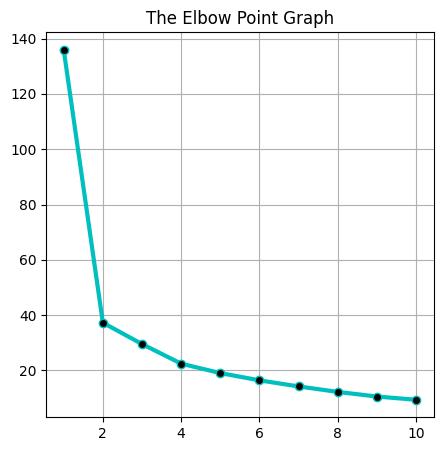

In [41]:
plt.figure(figsize=(5, 5))
plt.grid()
plt.plot(range(1, 11), wcss, color='c', linewidth=3, marker='o', markerfacecolor='k')
plt.title('The Elbow Point Graph')

In [58]:
kmeans_model2 = KMeans(n_clusters=3)
kmeans_model2.fit(df_2)
label = kmeans_model2.predict(df_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
label

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 2], dtype=int32)

In [60]:
from sklearn.metrics import silhouette_score

In [61]:
score = silhouette_score(X=df_2, labels=label)
score

0.5254074643532914